# Experiment Lecture 06: Using Hugging Face’s Pretrained Vision Transformers
Deep Learning, AI5302, 2025, Spring, (Tue/Thurs 2:30~3:45)
***


## Teaching Staff
- Professor: Kyoobin Lee (kyoobinlee@gist.ac.kr)
- **TA: 박성호 ([bakseongho@gm.gist.ac.kr](mailto:bakseongho@gm.gist.ac.kr))**
- TA: 이건협 ([lghjayly@gm.gist.ac.kr](mailto:lghjayly@gm.gist.ac.kr))
- TA: 노희선 ([heeseonrho@gm.gist.ac.kr](mailto:heeseonrho@gm.gist.ac.kr))
- TA: 고민환 ([mhko1998@gm.gist.ac.kr](mailto:mhko1998@gm.gist.ac.kr))
- TA: 김희수 ([huisu0103@gm.gist.ac.kr](mailto:huisu0103@gm.gist.ac.kr))


## Today's lecture
- ViT (Vision Transformer)
- DETR (DEtection TRansformer)



## Hugging Face

# 1. ViT (Vision Transformer)
### An Image is Worth 16X16 Words: Transformers for Image Recognition at Scale
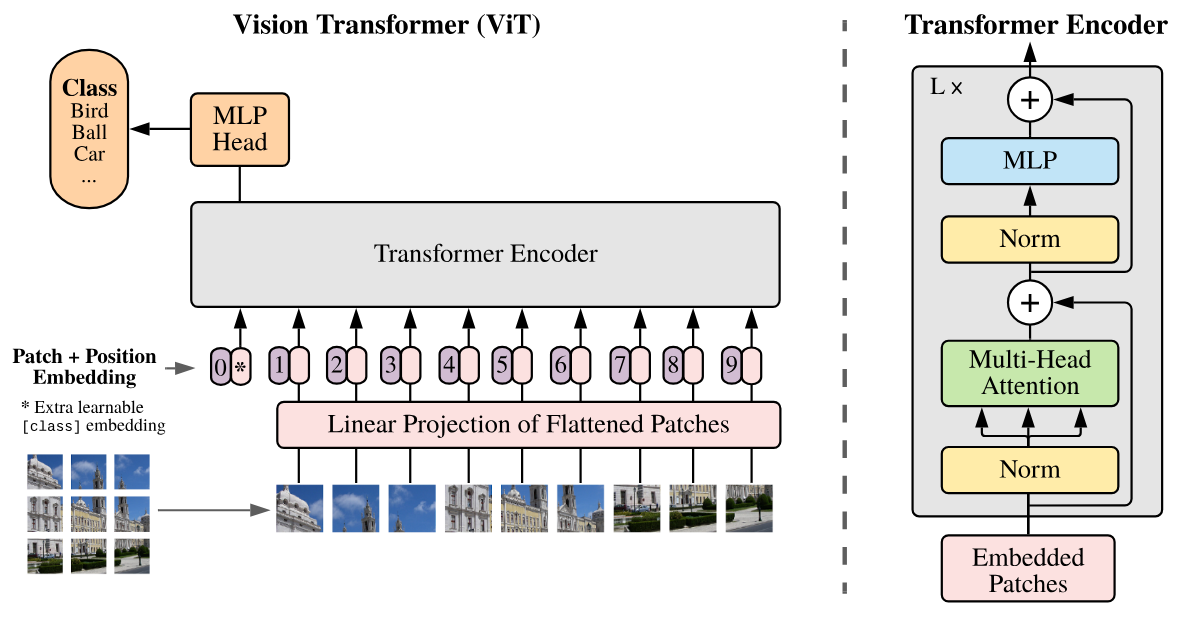

### Mount your Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


### Import Modules

In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from transformers import ViTForImageClassification, ViTFeatureExtractor
from torch.optim import Adam
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

from PIL import Image
import requests
from io import BytesIO

ModuleNotFoundError: No module named 'transformers'

In [16]:
def load_image(image_path):
    if image_path.startswith('http'):  # load from URL
        response = requests.get(image_path)
        img = Image.open(BytesIO(response.content))
    else:  # local 이미지 로드
        img = Image.open(image_path)
    return img

In [17]:
# preprocessing image
def preprocess_image(image):
    # Load feature extractor matching with ViT
    '''
    inference 할 때 feature extrator가 필요한 이유:
    train 때에는 data loader 혹은 별도의 전처리 과정을 추가하여 model에 넣지만
    inference 시에는 이미지를 모델이 학습한 방식으로 전처리해야 하기 때문에 필요함.
    '''
    '''
    Reason why a feature extractor is needed during inference:
    During training, data is fed into the model through a data loader or a separate preprocessing step.
    However, during inference, images need to be preprocessed in the same way the model learned from them. This is why a feature extractor is necessary.
    '''

    feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
    image = image.convert('RGB')    # Convert to RGB if not already
    inputs = feature_extractor(images=image, return_tensors="pt")
    return inputs

In [18]:
# Make ViT model and move on to device
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Load and preprocess image
# Later, we check the result whithin ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] classes.
image_path = '/content/gdrive/MyDrive/For_Student/CodingLecture/05.15.CodingLecture06/StudentUpload/20251066_car_image.jpg'  # change the path to your own image
image = load_image(image_path)
inputs = preprocess_image(image)
model_inputs = {key: value.to(device) for key, value in inputs.items()}  # move data to GPU/CPU

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
print(inputs)   # It shows the type of preprocessed data is dictionary

{'pixel_values': tensor([[[[ 0.6235,  0.6235,  0.6392,  ...,  0.8667,  0.8667,  0.8510],
          [ 0.6235,  0.6314,  0.6314,  ...,  0.8667,  0.8667,  0.8588],
          [ 0.6235,  0.6314,  0.6314,  ...,  0.8745,  0.8667,  0.8510],
          ...,
          [ 0.0353,  0.0667,  0.0745,  ...,  0.0588,  0.0667,  0.0902],
          [ 0.0275,  0.0588,  0.0667,  ...,  0.0667,  0.0510,  0.0431],
          [ 0.0431,  0.0353,  0.0745,  ...,  0.0902,  0.0824,  0.0588]],

         [[ 0.6235,  0.6235,  0.6314,  ...,  0.7961,  0.7882,  0.7725],
          [ 0.6235,  0.6235,  0.6314,  ...,  0.8039,  0.7961,  0.7804],
          [ 0.6078,  0.6157,  0.6157,  ...,  0.8118,  0.8039,  0.7804],
          ...,
          [-0.0980, -0.0588, -0.0588,  ..., -0.0745, -0.0588, -0.0510],
          [-0.1059, -0.0824, -0.0588,  ..., -0.0667, -0.0824, -0.0745],
          [-0.0980, -0.1059, -0.0588,  ..., -0.0431, -0.0510, -0.0667]],

         [[ 0.6235,  0.6235,  0.6392,  ...,  0.7176,  0.7098,  0.7020],
          [ 0

In [20]:
# 모델 예측
model.eval()
with torch.no_grad():
    outputs = model(**model_inputs)

In [21]:
# 예측 결과
logits = outputs.logits
predicted_class_idx = torch.argmax(logits, dim=-1).item()

In [22]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted_class = class_names[predicted_class_idx]

print(f"Predicted Class: {predicted_class}")

Predicted Class: automobile


## [Coding Your Self]
---
- Train ViT with Fashion-MNIST (It is ok to train just one epoch.).
- Check the output with test set.
- Just check the training loop works well. You don't have to complete training.

In [23]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from transformers import ViTForImageClassification, ViTFeatureExtractor
from torch.optim import Adam
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

In [24]:
# Prepare Dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ViT는 224x224 크기의 이미지 입력 필요
    transforms.Grayscale(num_output_channels=3),  # Fashion MNIST는 1채널이므로, 3채널로 변환
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet 평균과 표준편차로 정규화
])

# Load Fashion-MNIST
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Prepare Dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ViT needs the size of 224x224
    transforms.Grayscale(num_output_channels=3),  # Fashion MNIST is 1 channel. Change is to 3 channel.
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.30MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 13.1MB/s]


In [26]:
# make model
model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k", num_labels=10)

# optimizer (Adame, lr=1e-4)
optimizer = Adam(model.parameters(), lr=1e-4)

# loss function (Cross Entropy)
criterion = nn.CrossEntropyLoss()

# Device

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermed

In [27]:
num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for inputs, labels in tqdm(train_loader, desc=f'epoch {epoch}'):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward
        outputs = model(inputs).logits
        loss = criterion(outputs, labels)

        # Backprop. & Optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 통계
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct_predictions / total_predictions
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

epoch 0:   5%|▍         | 89/1875 [01:43<34:29,  1.16s/it]


KeyboardInterrupt: 

In [28]:
# model evaluation
model.eval()
correct_predictions = 0
total_predictions = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Check the outputs
        outputs = model(inputs).logits
        _, predicted
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)

test_accuracy = 100 * correct_predictions / total_predictions
print(f"Test Accuracy: {test_accuracy:.2f}%")

KeyboardInterrupt: 


# 2. DETR (DEtection TRansformer)
### End-to-End Object Detection with Transformers

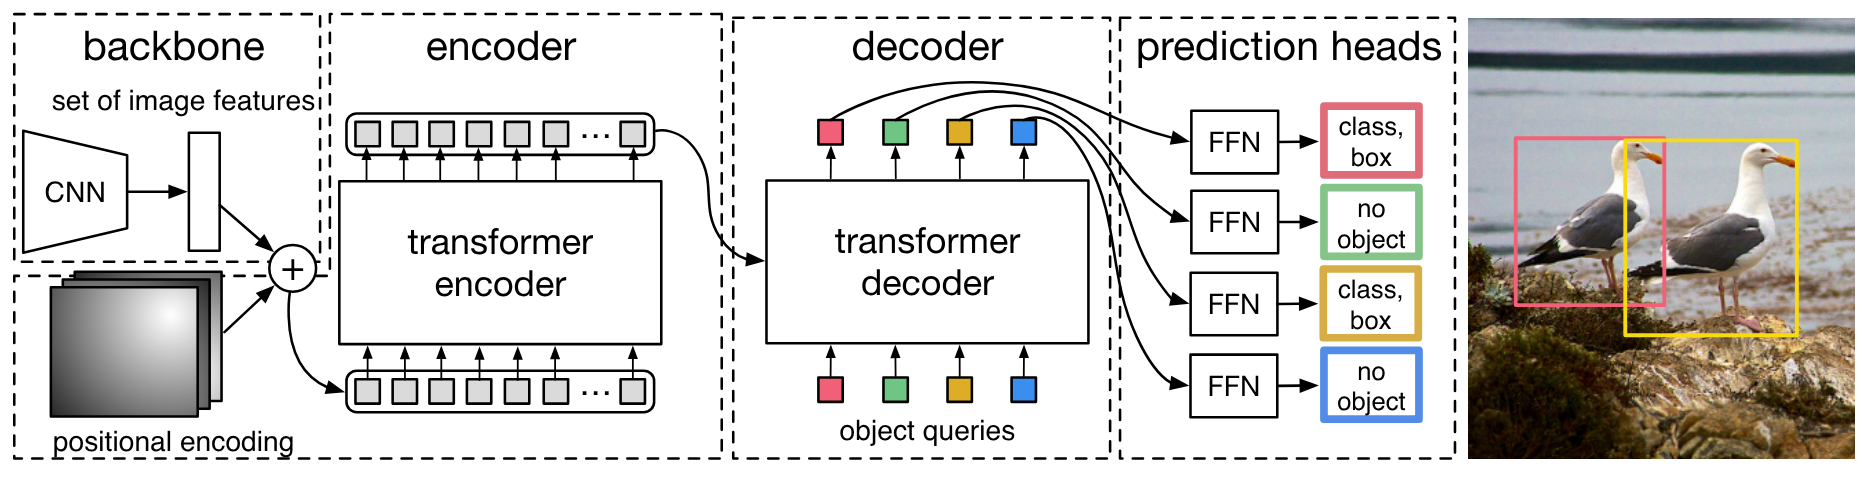

### 2.1 Defining a class

---

In [ ]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt

# Get pretrained model and processor
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
image_path = '/content/gdrive/MyDrive/data/sample.jpg'  # image path
image = load_image(image_path)
inputs = preprocess_image(image)

### Model Prediction

In [ ]:
with torch.no_grad():
    outputs = model(**inputs)

### Filter out the result

In [ ]:
# Filter that has a confidence score over 0.9
target_sizes = torch.tensor([image.size[::-1]])  # image size: (H, W)
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

### Visualize the Result

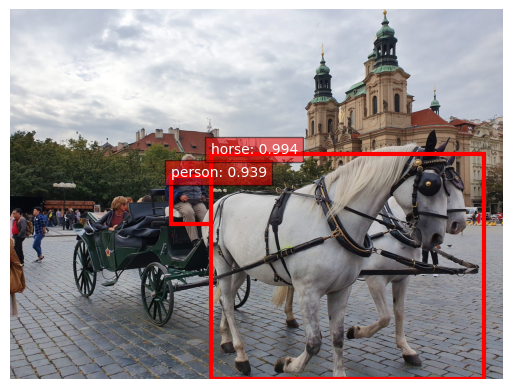

In [ ]:
plt.imshow(image)
ax = plt.gca()
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    ax.add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, color="red", linewidth=3))
    ax.text(box[0], box[1], f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}", fontsize=10, color="white", bbox=dict(facecolor='red', alpha=0.5))

plt.axis("off")
plt.show()